# **Tugas Kelompok Pertemuan 11 Pengantar Data Sains**
Dosen pengampu: Endang Yuliani, S.Mat., M.Si.

**Anggota Kelompok 4:**

- Rafi King Akbar (1314623018)
- Hansen Juliantino (1314623044)
- Oki Ramadhan Pramono (1314623067)


#**1.Baca Data**

###a.Load dari Github

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/rafikingakbar/KNNPlayground/refs/heads/main/data/heart_failure_clinical_records_dataset.xlsx%20-%20heart_failure_clinical_records_.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,"1,9",130,1,0,4,1
1,55,0,7861,0,38,0,"263358,03","1,1",136,1,0,6,1
2,65,0,146,0,20,0,162000,"1,3",129,1,1,7,1
3,50,1,111,0,20,0,210000,"1,9",137,1,0,7,1
4,65,1,160,1,20,0,327000,"2,7",116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000,"1,1",143,1,1,270,0
295,55,0,1820,0,38,0,270000,"1,2",139,0,0,271,0
296,45,0,2060,1,60,0,742000,"0,8",138,0,0,278,0
297,45,0,2413,0,38,0,140000,"1,4",140,1,1,280,0


#**2.Preprocessing Data**

###a. Liat info data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       299 non-null    object
 1   anaemia                   299 non-null    int64 
 2   creatinine_phosphokinase  299 non-null    int64 
 3   diabetes                  299 non-null    int64 
 4   ejection_fraction         299 non-null    int64 
 5   high_blood_pressure       299 non-null    int64 
 6   platelets                 299 non-null    object
 7   serum_creatinine          299 non-null    object
 8   serum_sodium              299 non-null    int64 
 9   sex                       299 non-null    int64 
 10  smoking                   299 non-null    int64 
 11  time                      299 non-null    int64 
 12  DEATH_EVENT               299 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 30.5+ KB


###b. Cek nilai unik untuk kolom Object

In [ ]:
df["serum_creatinine"].unique()[:50]

array(['1,9', '1,1', '1,3', '2,7', '2,1', '1,2', '1,5', '9,4', '4', '0,9',
       '1', '0,8', '1,6', '1,83', '5,8', '3', '3,5', '2,3', '0,6', '4,4',
       '1,4', '6,8', '2,2', '2', '1,18', '2,9', '0,7', '1,7', '2,5',
       '1,8', '3,2', '0,75', '3,7', '3,4', '6,1', '2,4', '9', '5', '0,5',
       '3,8'], dtype=object)

In [ ]:
df["platelets"].unique()[:50]

array(['265000', '263358,03', '162000', '210000', '327000', '204000',
       '127000', '454000', '388000', '368000', '253000', '136000',
       '276000', '427000', '47000', '262000', '166000', '237000', '87000',
       '297000', '289000', '149000', '196000', '284000', '153000',
       '200000', '360000', '319000', '302000', '188000', '228000',
       '226000', '321000', '305000', '329000', '185000', '218000',
       '194000', '310000', '271000', '451000', '140000', '395000',
       '418000', '351000', '255000', '461000', '223000', '216000',
       '254000'], dtype=object)

In [ ]:
df["age"].unique()[:50]

array(['75', '55', '65', '50', '90', '60', '80', '62', '45', '49', '82',
       '87', '70', '48', '68', '53', '95', '58', '94', '85', '69', '72',
       '51', '57', '42', '41', '67', '79', '59', '44', '63', '86', '66',
       '43', '46', '61', '81', '52', '64', '40', '60,667', '73', '77',
       '78', '54', '47', '56'], dtype=object)

###c. Perbaikan format angka

In [ ]:
clean_col = ["serum_creatinine", "platelets", "age"]

for col in clean_col:
    df[col] = df[col].str.replace(",", ".", regex=False)

###d. Ubah kolom obj jadi num

In [ ]:
convert_col = ["serum_creatinine", "platelets", "age"]

for col in convert_col:
    df[col] = pd.to_numeric(df[col], errors="coerce")

###e. Cek missing value

In [ ]:
df.isnull().sum()


,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


#**3.EDA**

###a. Distribusi Label (DEATH_EVENT)

/tmp/ipython-input-1821004983.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["DEATH_EVENT"], palette="Blues")


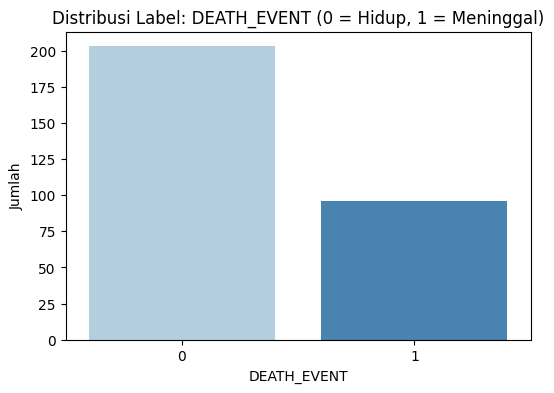

,count
DEATH_EVENT,
0,203
1,96


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df["DEATH_EVENT"], palette="Blues")

plt.title("Distribusi Label: DEATH_EVENT (0 = Hidup, 1 = Meninggal)")
plt.xlabel("DEATH_EVENT")
plt.ylabel("Jumlah")
plt.show()

df["DEATH_EVENT"].value_counts()

###b. Korelasi dengan Heatmap

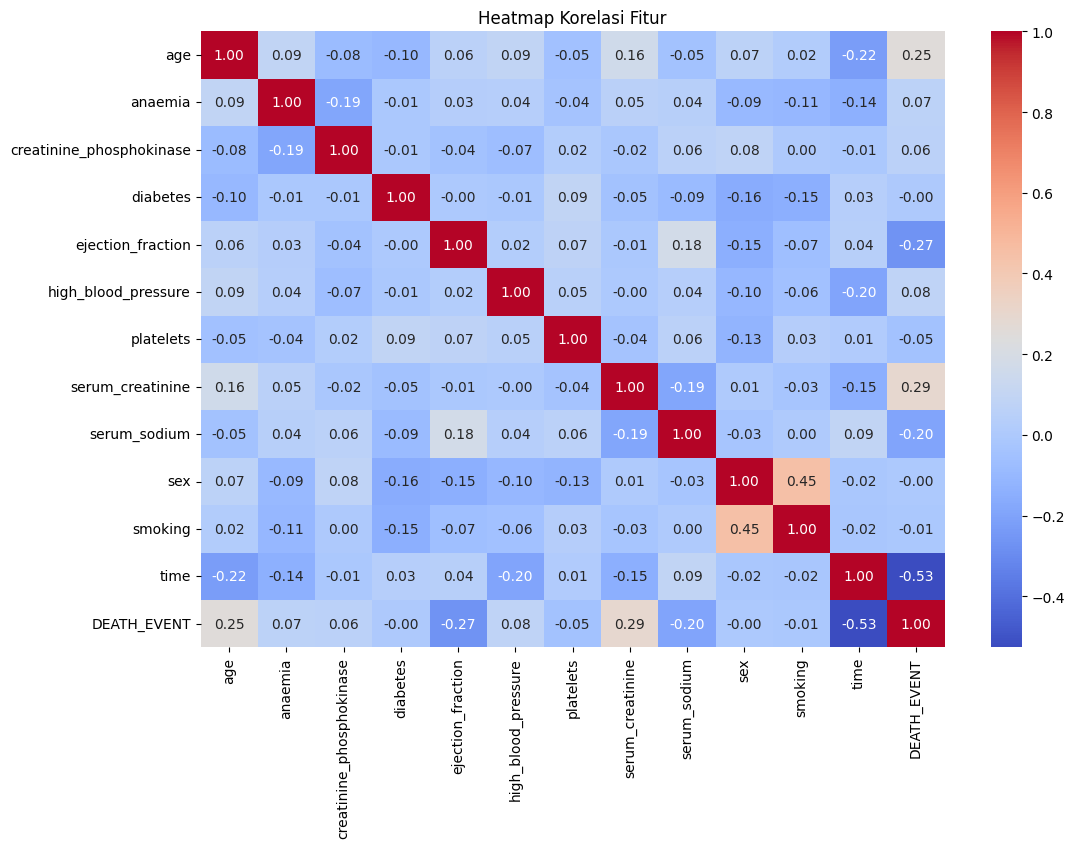

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Fitur")
plt.show()

#**4. Modelling**

###a. Pisahkan fitur dan label

In [ ]:
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

###b. Bangun pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

###c. Menentukan nilai k

In [ ]:
k_values = [3, 4, 5, 6, 7, 8, 9, 11, 13, 15]

###d. Cross Validation (5-Fold) - KFold Biasa

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mean_scores = []

for k in k_values:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])

    scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
    mean_scores.append(scores.mean())

In [ ]:
for k, acc in zip(k_values, mean_scores):
    print(f"K = {k}, Mean Accuracy = {acc:.4f}")

K = 3, Mean Accuracy = 0.7224
K = 4, Mean Accuracy = 0.7124
K = 5, Mean Accuracy = 0.7426
K = 6, Mean Accuracy = 0.7325
K = 7, Mean Accuracy = 0.7457
K = 8, Mean Accuracy = 0.6990
K = 9, Mean Accuracy = 0.7290
K = 11, Mean Accuracy = 0.7224
K = 13, Mean Accuracy = 0.7192
K = 15, Mean Accuracy = 0.7124


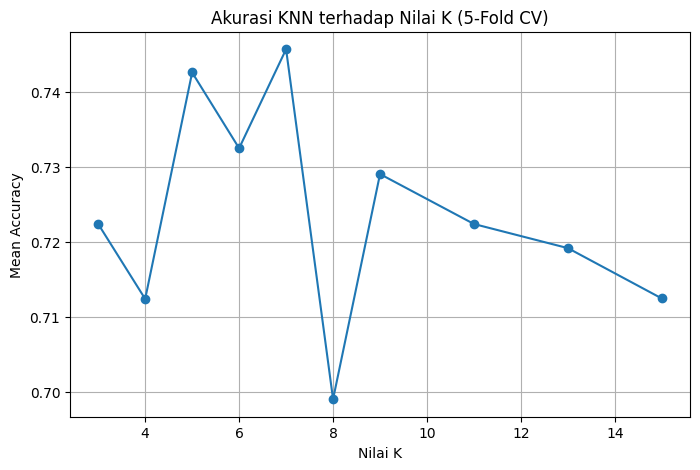

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(k_values, mean_scores, marker='o')
plt.title("Akurasi KNN terhadap Nilai K (5-Fold CV)")
plt.xlabel("Nilai K")
plt.ylabel("Mean Accuracy")
plt.grid(True)
plt.show()


###e. Cari nilai K terbaik

In [ ]:
best_k = k_values[mean_scores.index(max(mean_scores))]
best_acc = max(mean_scores)

print(f"\nK terbaik adalah K = {best_k} dengan mean accuracy = {best_acc:.4f}")


K terbaik adalah K = 7 dengan mean accuracy = 0.7457


###f. Akurasi per fold untuk K terbaik dan Standar Deviasi

In [ ]:
from sklearn.model_selection import cross_val_score

pipeline_best = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=best_k))
])

cv_best = cross_val_score(pipeline_best, X, y, cv=kf, scoring = "accuracy")

print("\nAkurasi per fold:", cv_best)
print("Rata-rata:", cv_best.mean())
print("Standar deviasi:", cv_best.std())


Akurasi per fold: [0.68333333 0.73333333 0.8        0.8        0.71186441]
Rata-rata: 0.7457062146892655
Standar deviasi: 0.04708367600563066


###g. Precision, Recall, F1-Score

In [ ]:
from sklearn.model_selection import cross_val_score

precision_scores = cross_val_score(pipeline_best, X, y, cv=kf, scoring='precision')
recall_scores    = cross_val_score(pipeline_best, X, y, cv=kf, scoring='recall')
f1_scores        = cross_val_score(pipeline_best, X, y, cv=kf, scoring='f1')

print("\nPrecision per fold:", precision_scores)
print("Mean precision:", precision_scores.mean())

print("\nRecall per fold:", recall_scores)
print("Mean recall:", recall_scores.mean())

print("\nF1-score per fold:", f1_scores)
print("Mean F1-score:", f1_scores.mean())


Precision per fold: [1.         0.90909091 0.625      0.71428571 0.5       ]
Mean precision: 0.7496753246753247

Recall per fold: [0.24       0.4        0.35714286 0.33333333 0.29411765]
Mean recall: 0.32491876750700277

F1-score per fold: [0.38709677 0.55555556 0.45454545 0.45454545 0.37037037]
Mean F1-score: 0.44442272184207665
